<b>How are you going to process the data to apply it
   to the model? (ex. how many splits, what proportions 
                  will you use for the splits, at which
                  stage will you split, will there be a 
                  validation set? Will you use cross
                  validation? </b>
- 5 splits will be used
- 75% of the data will be used for training, 25% for testing
-5 fold cross-validation will be used with the minumum RMSPE K value
- We first standardize the data in the recipe
- Then we make the spec
- then we use 5 fold cross validation
  

<b>Broad Question: Question 2 (We would like to know which "kinds"
                            of players are most likely to contribute
                            a large amount of data so that we can target
                            those players in our recruiting efforts)</b>

Specific Question: *What gender and age group plays the longest hours?*

How the data will address the question of interest 
(The plan for wrangling to apply a predictive method 
 from class):

The data will find the gender and age groups that play the most hours, 
so that they can be recruited as they contribute a large amount of data. 

The plan is to use multivariable KNN regression in order to predict
the hours a participant of a certain gender and age
group will play. 

The players data set will be used.

Title

Introduction (Provide relevant background information)

Title

Introduction (Provide relevant background information)

## Methods

First, we need to load in the tidyverse package so we have the necessary tools to analyze the data.

In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
library(infer)
library(rvest)
library(themis)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Next, we read in the data from the raws on GitHub.

In [2]:
players_url <- "https://raw.githubusercontent.com/cindylemon/plaicraft-individual-project/refs/heads/main/players.csv"
players <- read_csv(players_url)
head(players)

sessions_url <- "https://raw.githubusercontent.com/cindylemon/plaicraft-individual-project/refs/heads/main/sessions.csv"
sessions <- read_csv(sessions_url)
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


One of the first things we need to do is to select the variables we will need for the models and clear out rows with empty values.

In [3]:
player_selected <- players |> select(Age, gender, played_hours) |>
mutate(gender = as_factor(gender)) |> mutate(gender = as.numeric(gender))
head(player_selected)

Age,gender,played_hours
<dbl>,<dbl>,<dbl>
9,1,30.3
17,1,3.8
17,1,0.0
21,2,0.7
21,1,0.1
17,2,0.0


We can make an exploratory data plot that shows us the current representation of the relationship between age and hours played.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


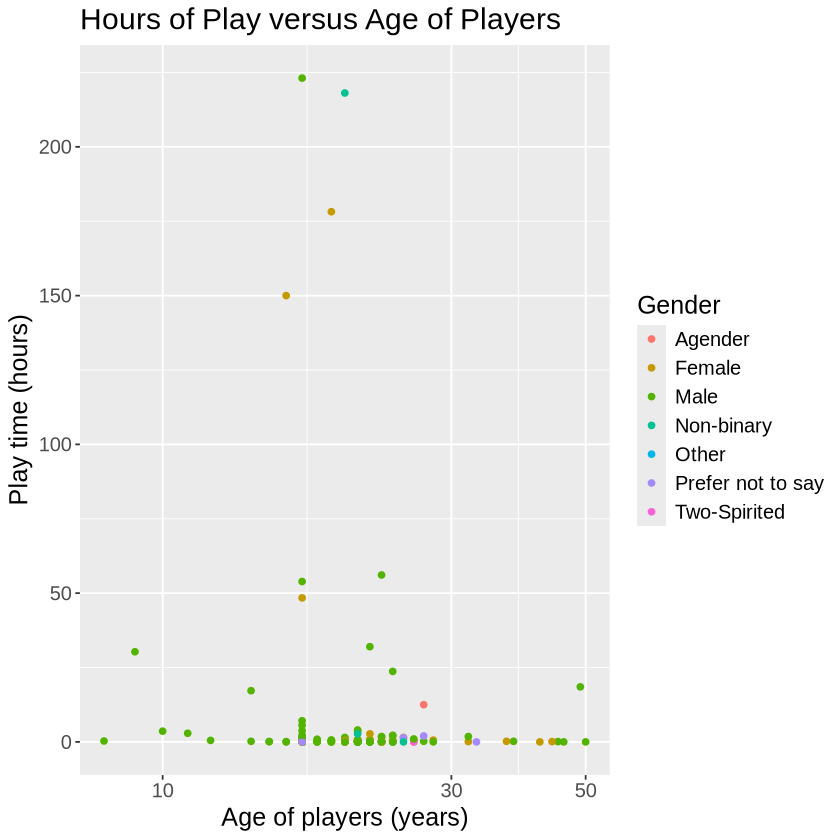

In [4]:
players_scatter_coloured <- players |>
    ggplot(aes(x = Age, y = played_hours)) +
    geom_point(aes(color = gender)) +
    labs(title = "Hours of Play versus Age of Players", x = "Age of players (years)",
         y = "Play time (hours)", color = "Gender") +
    scale_x_log10()+
    theme(text = element_text(size = 15))

players_scatter_coloured

We then have to make the model for the regression.

Because regression is done with numerical values, we can arbitratily assign numerical values to our gender variable.
- Male = 1
- Female = 2
- Non-binary = 3
- Other = 7 
- Prefer not to say = 4
- Two-spirited = 6


First, let's set the seed and split the data into training and testing sets. The dataset is divided based on played hours using a 75:25 split — 75% for training and 25% for testing

In [5]:
set.seed(233)
hours_split <-initial_split(player_selected, prop=0.75, strata=played_hours)
hours_train <-training(hours_split)|> drop_na()
hours_test <-testing(hours_split)|> drop_na()


We use a K-Nearest Neighbors (KNN) regression to predict played hours, a continuous variable. We chose the hours played as the predicted value, with the training data as the data. We use the "rectangular" weight function in the specification and standardized variables so that all variables contribute to the prediction equally. 

This is all done without specifying a single value for our number of neighbors, as we don't know what the most effective value of K would be.

In [6]:
player_recipe <- recipe(played_hours~., data = hours_train) |>
                 step_scale(all_predictors()) |> # standardizes the variables
                 step_center (all_predictors())

player_spec <- nearest_neighbor(weight_func = "rectangular",
                              neighbors = tune()) |> # we don't have the exact number of neighbors yet
                              set_engine("kknn") |>
                              set_mode("regression")

player_wkflw <- workflow() |>
  add_recipe(player_recipe) |>
  add_model(player_spec)

To find the number of neighbors we need, we first split the data into 5 parts to cross-validate it, allowing us to test the reliability of the model. The training set is used to build the predictive model, while the test set evaluates the model’s performance using the Root Mean Squared Error (RMSE) as a metric.

We then plot the RMSPE values against the number of neighbors in order to find the number of neighbors we should use in the regression. That number happens to be 37.


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
34,rmse,standard,30.47152,5,5.337726,Preprocessor1_Model12
37,rmse,standard,30.19009,5,5.527381,Preprocessor1_Model13
40,rmse,standard,30.20083,5,5.544919,Preprocessor1_Model14
43,rmse,standard,30.13829,5,5.637122,Preprocessor1_Model15
46,rmse,standard,30.10258,5,5.676553,Preprocessor1_Model16
49,rmse,standard,30.09730,5,5.696231,Preprocessor1_Model17


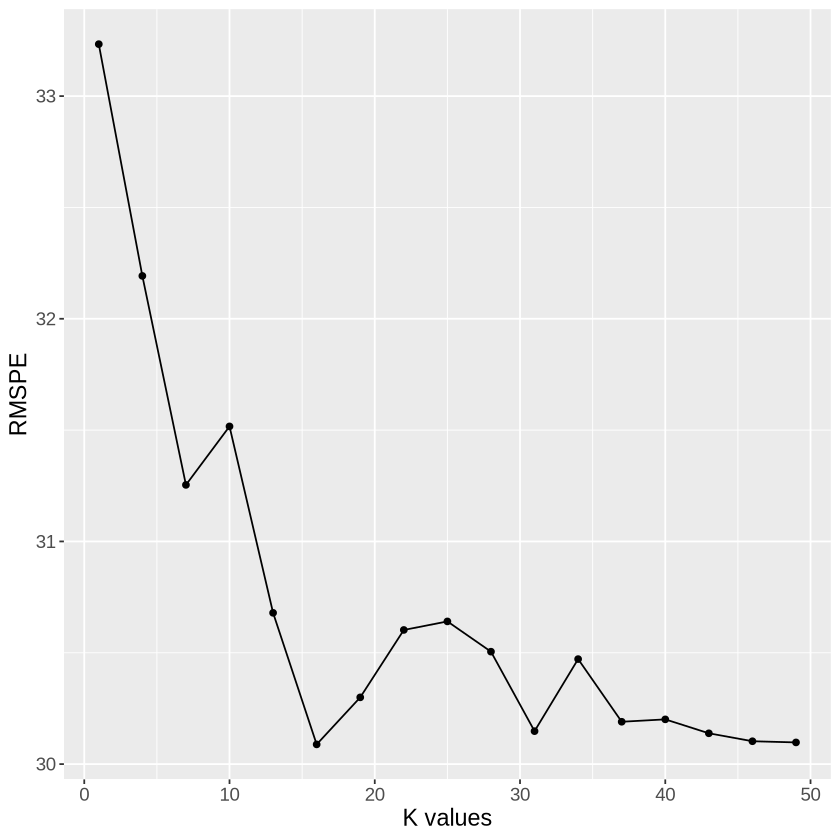

In [7]:
player_vfold <- vfold_cv(hours_train, v = 5, strata = played_hours)


gridvals <- tibble(neighbors = seq(from = 1, to = 50, by = 3))

player_results <- player_wkflw |>
  tune_grid(resamples = player_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")


player_plot <-ggplot(player_results, aes(x=neighbors,y=mean))+
              geom_point() +
              geom_line() +
              labs(x = "K values", y= "RMSPE") + 
              theme(text = element_text(size = 14))
player_plot


tail(player_results)

kmin <- 37

Now we can remake the workflow with the proper specifications. We now know that we will use 37 neighbors, so we plug that into the function.

In [8]:
player_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) |>
  set_engine("kknn") |>
  set_mode("regression")

player_fit <- workflow() |>
  add_recipe(player_recipe) |>
  add_model(player_spec) |>
  fit(data = hours_train)


.pred,Age,gender,played_hours
<dbl>,<dbl>,<dbl>,<dbl>
7.497297,22,2,0.0
6.686486,17,1,0.0
1.145946,23,1,1.8
1.145946,20,1,0.4
6.686486,17,1,0.0
1.145946,24,1,2.2


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,13.00473


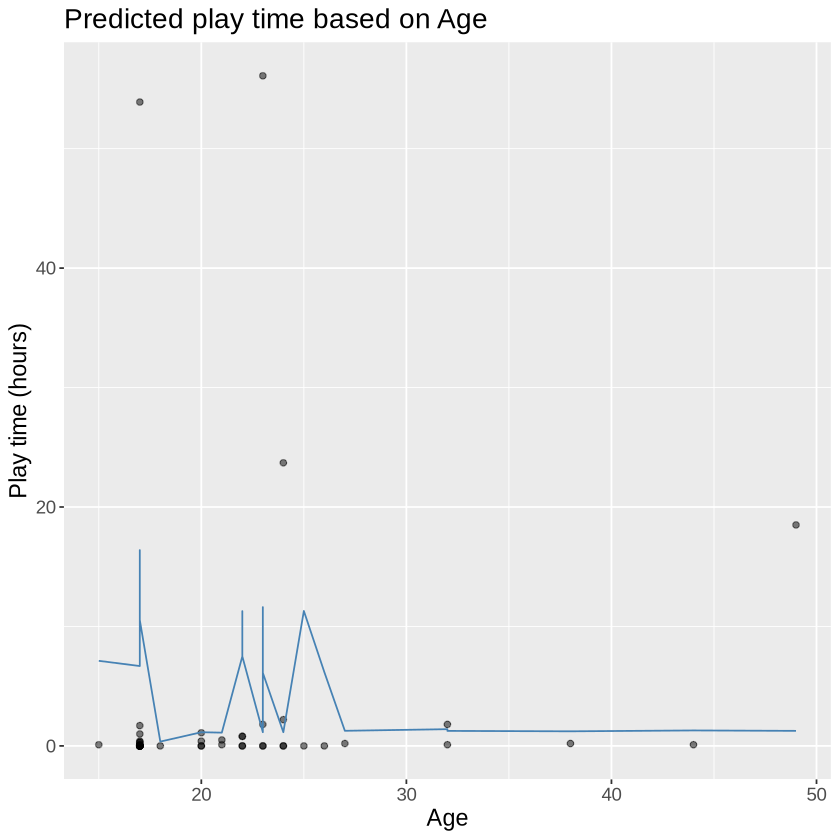

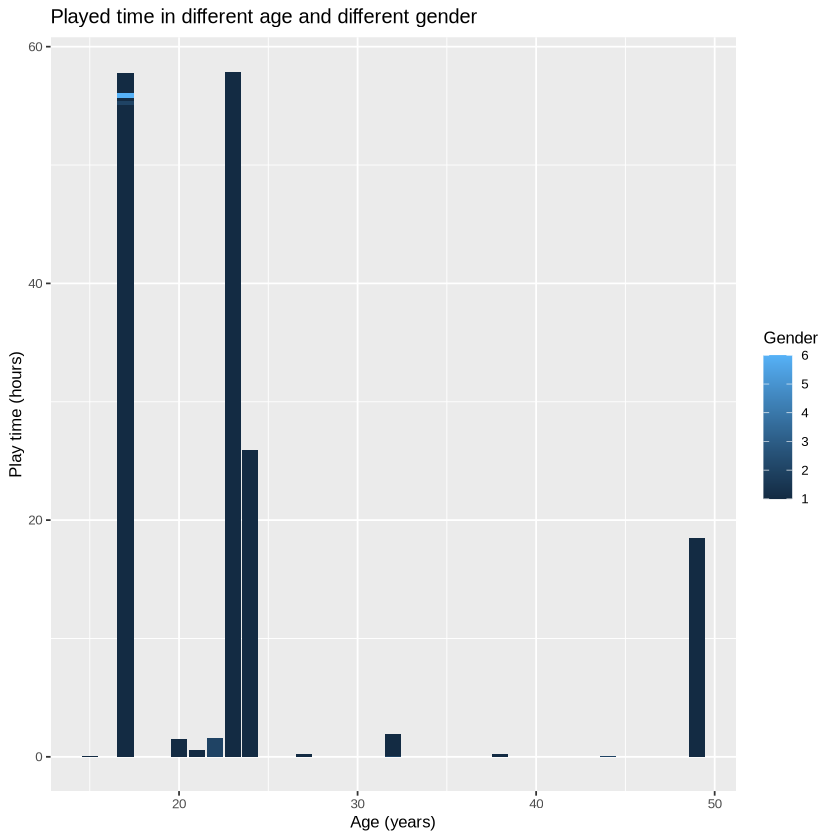

In [19]:



player_prediction <- player_fit |> #isn't this supposed to be prediction? can we name it players_predicted
 predict(hours_test) |>
 bind_cols(hours_test)
head(player_prediction)
player_metrics <-metrics(player_prediction, truth = played_hours, estimate = .pred) |>
                filter(.metric == 'rmse')

player_metrics


final_plot_age <- ggplot(player_prediction, aes(x = Age, y = played_hours)) +
  geom_point(alpha = 0.5) +
  geom_line(data = player_prediction,
            mapping = aes(x = Age, y = .pred),
            color = "steelblue",) +
  xlab("Age") +
  ylab("Play time (hours)") +
  ggtitle("Predicted play time based on Age") +
  theme(text = element_text(size = 14))
final_plot_age

final_plot_gender <- ggplot(player_prediction, aes(x = Age, y = played_hours)) +
  geom_point(alpha = 0.5) +
  geom_line(data = player_prediction,
            mapping = aes(x = gender, y = .pred),
            color = "steelblue",) +
  xlab("Gender") +
  ylab("Play time (hours)") +
  ggtitle("Predicted play time based on Age") +
  theme(text = element_text(size = 14))

gender_bar <- ggplot(player_prediction,
                      aes(x = Age,
                          y = played_hours,
                          fill= gender)) +
  geom_bar(stat="identity") +
  labs(x = "Age (years)",
       y = "Play time (hours)",
       fill = "Gender",
       title = "Played time in different age and different gender") +
       theme(text = element_text(size = 10))
#need to make this into a bar graph or change the x axis scale because gender = specific numbers

gender_bar



The blue line is the predicted values of the play time (but also it is supposed to be based on gender and age, so why is the x axis just age?)
Let's also make a visualization for gender, and explain that we made two plots since we can't make a 3D plot here

precision = how many of the positive predictions the classifier made were 
actually positive

recall = number of correct positive predictions/total number of positive
test set observations 

In [13]:
?tibble()

reexports {dplyr},R Documentation


In [18]:
new_player <- tibble(age = 25, gender = "male")
new_player

age,gender
<dbl>,<chr>
25,male


Testing our model by predicting a new player's play time with it